In [5]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136820 sha256=ec0304d69a60812b89f689214091e369ffe0878de560b3940f29f8d502257157
  Stored in directory: /home/xiongj1/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [1]:
# Required imports
from qiskit.quantum_info import Statevector, Operator
from numpy import sqrt
from qiskit.visualization import plot_histogram

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# Step 1: Initialize a 2-qubit quantum circuit with classical registers
# The quantum register `qreg_q` has 2 qubits
# The classical register `creg_c` has 2 classical bits

# Initialize the circuit by putting both qubits in a superposition state
circuit.h(qreg_q[0])  # Apply a Hadamard gate to qubit 0
circuit.h(qreg_q[1])  # Apply a Hadamard gate to qubit 1
# After this step, the quantum state is a uniform superposition of all possible states: |00>, |01>, |10>, |11>

# Step 2: Oracle step - Mark the target state |11>
circuit.cz(qreg_q[0], qreg_q[1])  
# The controlled-Z (CZ) gate flips the phase of the |11> state, changing it to -|11>
# Other states remain unchanged

# Step 3: Diffuser step - Amplify the probability of the target state |11>
# The diffuser operation reflects the current state about the mean amplitude of all states

# Apply Hadamard gates to both qubits to transform back to the computational basis
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])

# Apply X gates to invert the states |0> to |1> and |1> to |0>
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])

# Add an additional CZ gate as part of the diffuser
# The controlled-X (CNOT) and Hadamard gates perform the reflection around the mean
circuit.h(qreg_q[1])  # Prepare qubit 1 for reflection
circuit.cx(qreg_q[0], qreg_q[1])  # Controlled-X (CNOT) gate between qubits 0 and 1
circuit.h(qreg_q[1])  # Complete the reflection operation on qubit 1

# Undo the X gates to revert back to the original state
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])

# Apply Hadamard gates again to finalize the diffuser operation
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])

# Step 4: Display the quantum state after the oracle and diffuser steps
# Extract the statevector of the circuit before measurement
psi = Statevector.from_instruction(circuit)  # Get the statevector of the circuit
display(psi.draw("latex"))  # Visualize the quantum state in LaTeX format
# At this point, the target state |11> should have the highest amplitude

# Step 5: Add measurement operations
# Measure the quantum state to observe the output
circuit.measure(qreg_q[0], creg_c[0])  # Measure qubit 0 and store the result in classical bit 0
circuit.measure(qreg_q[1], creg_c[1])  # Measure qubit 1 and store the result in classical bit 1
# The measurement collapses the quantum state to a classical result

<IPython.core.display.Latex object>

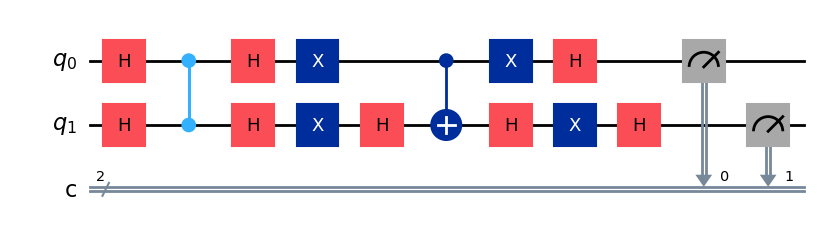

In [3]:
display(circuit.draw(output='mpl'))

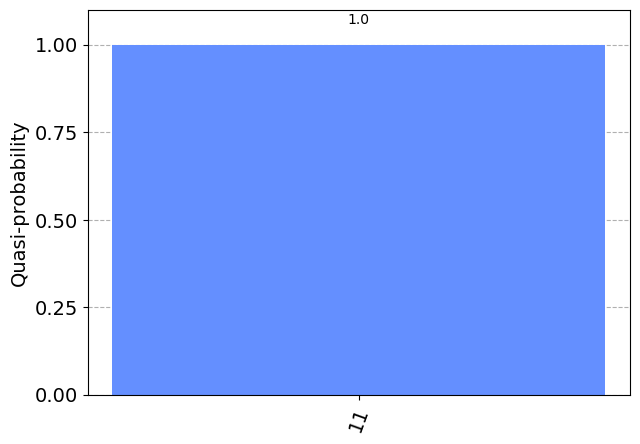

In [4]:
from qiskit_aer.primitives import Sampler
# Simulating the circuit
results = Sampler().run(circuit).result()
statistics = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))

This implementation demonstrates Grover's algorithm on a 2-qubit system, aiming to find the target state ∣11⟩. The algorithm consists of three main steps: initializing the qubits in a superposition state, applying the Oracle to mark the target state by flipping its phase, and using the Diffuser to amplify the probability of the target state. After running the algorithm, the final quantum state shows the target state ∣11⟩ with the highest amplitude.

The simulation results confirm the success of Grover's algorithm. The histogram shows that the target state ∣11⟩ has a quasi-probability of 100%, demonstrating the algorithm's efficiency in amplifying the desired state's likelihood. This serves as a foundation for scaling to larger search spaces and exploring practical quantum applications.